In [18]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
from keras import layers

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## Fashin Mnist 불러오기

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## 데이터 차원 확인

In [6]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 데이터 정체 확인

In [9]:
train_x[0].shape #2D scalar data

(28, 28)

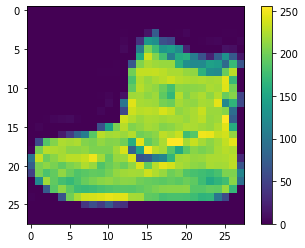

In [10]:
plt.imshow(train_x[0])
plt.colorbar()
plt.show()

In [11]:
train_y[0] 

9

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 표준화(0~1)

In [13]:
train_x=train_x/255.0
test_x=test_x/255.0

## 표준화 후 그림 확인

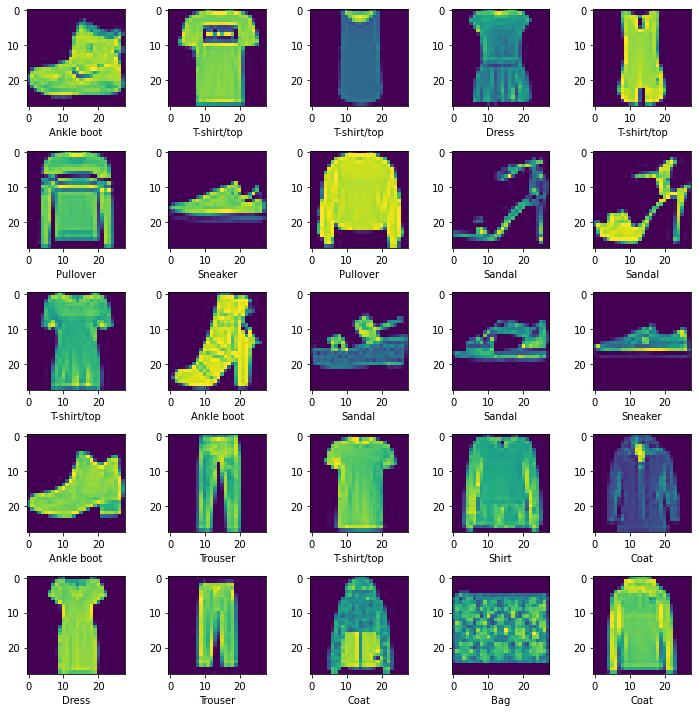

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5,5,figsize=(10,10))

for i in range(25):
    k,j = i//5, i%5    
    axs[k,j].imshow(train_x[i])
    axs[k,j].set_xlabel(class_names[train_y[i]])

fig.tight_layout()

## 모델 빌딩 (Fully Connected Neural Network)

In [15]:
def build_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28,28)), # 2D scalar를 1차원으로
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax'),
        
    ])

    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
model=build_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [21]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [22]:
history = model.fit(train_x, train_y, epochs=1000, validation_split = 0.2, batch_size=64,
                    callbacks=[early_stop])

Epoch 1/1000
750/750 [==============================] - 4s 4ms/step - loss: 0.5389 - accuracy: 0.8132 - val_loss: 0.4169 - val_accuracy: 0.8513
Epoch 2/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.3958 - accuracy: 0.8575 - val_loss: 0.4061 - val_accuracy: 0.8571
Epoch 3/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.3559 - accuracy: 0.8722 - val_loss: 0.3797 - val_accuracy: 0.8648
Epoch 4/1000
750/750 [==============================] - 3s 5ms/step - loss: 0.3311 - accuracy: 0.8801 - val_loss: 0.3424 - val_accuracy: 0.8772
Epoch 5/1000
750/750 [==============================] - 5s 6ms/step - loss: 0.3111 - accuracy: 0.8861 - val_loss: 0.3494 - val_accuracy: 0.8712
Epoch 6/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.2963 - accuracy: 0.8915 - val_loss: 0.3463 - val_accuracy: 0.8756
Epoch 7/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.2840 - accuracy: 0.8963 - val_loss: 0.3241 - val_accuracy:

## 테스팅 데이터로 확인

In [23]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8792


[0.3824830949306488, 0.8791999816894531]

## 예측된 데이터 분석

In [24]:
model.predict(test_x)[0] # 0~9 사이의 카테고리에 들어갈 확률


313/313 [==============================] - 1s 3ms/step


array([9.2480956e-09, 1.1864057e-08, 1.3849849e-07, 8.0467899e-08,
       1.6650293e-09, 8.2997733e-04, 2.0070208e-07, 4.7503421e-03,
       8.5576801e-08, 9.9441916e-01], dtype=float32)

313/313 [==============================] - 1s 4ms/step


<BarContainer object of 10 artists>

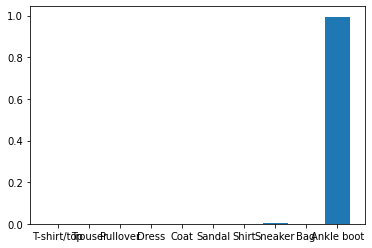

In [25]:
plt.bar(class_names, model.predict(test_x)[0])

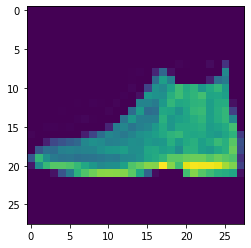

In [26]:
plt.imshow(test_x[0])

## 못맞춘 데이터 분석

In [29]:
# argmax : 각 데이터마다 최대값 index 반환 = 모형이 예측한 카테고리 의미
pred = model.predict(test_x).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [30]:
np.where(test_y!=pred)

(array([  12,   17,   23, ..., 9961, 9972, 9977]),)

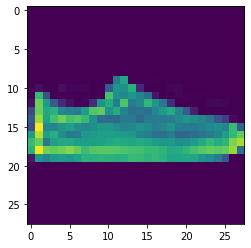

In [31]:
plt.imshow(test_x[12])

313/313 [==============================] - 1s 2ms/step


<BarContainer object of 10 artists>

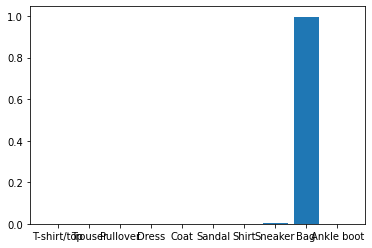

In [33]:
plt.bar(class_names, model.predict(test_x)[12])